In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, root_mean_squared_error

### Q1. Downloading the data
We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for January and February 2023.

- Read the data for January. How many columns are there?

In [5]:
# Read the data for January 
df = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')

# Print the number of columns
print(f"Number of columns: {len(df.columns)}")

Number of columns: 19


- Verify by inspecting the DataFrame

In [6]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


- Answer: 19

### Q2. Computing duration
Now let's compute the duration variable. It should contain the duration of a ride in minutes.

- What's the standard deviation of the trips duration in January?

In [7]:
# Calculate the duration of the trip in minutes
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

- Inspect the DataFrame for the duration column

In [8]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [9]:
# Calculate the standard deviation of the trips duration
std_duration = df.duration.std()
print(f"Standard deviation of the trips duration: {std_duration:.2f} minutes")

Standard deviation of the trips duration: 42.59 minutes


- Answer: 42.59

### Q3. Dropping outliers
Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).
- What fraction of the records left after you dropped the outliers?

<Axes: xlabel='duration', ylabel='Density'>

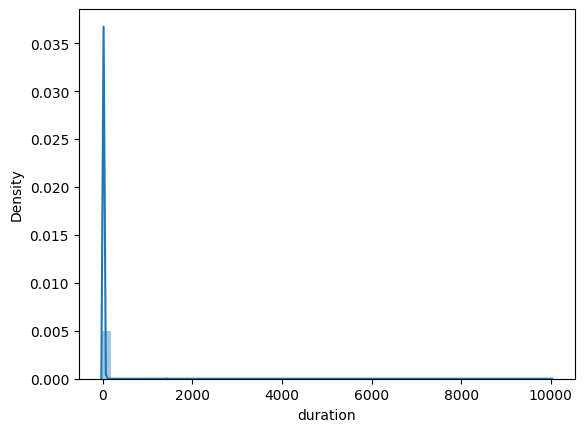

In [10]:
# Check the distribution of the trip duration for outliers
sns.distplot(df.duration)

- This shows us a long tail distribution, so we will filter the trips with duration data between 1 and 60 minutes.

In [11]:
# Filter duration between 1 and 60 minutes (inclusive)
df_train = df[(df.duration >= 1 ) & (df.duration <= 60)]

<Axes: xlabel='duration', ylabel='Density'>

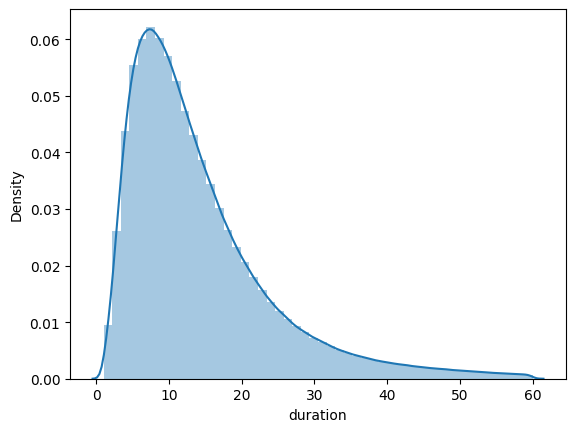

In [12]:
# Check the distribution of the trip duration after filtering
sns.distplot(df_train.duration)

In [13]:
# Calculate the fraction of trips that are kept
fraction = (len(df_train) / len(df)) * 100
print(f"Fraction of trips that are kept: {fraction:.2f}")

Fraction of trips that are kept: 98.12


- Answer: 98%

### Q4. One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

- Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
- Fit a dictionary vectorizer
- Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [14]:
# Define the categorical and numerical features
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# Re-cast the categorical ID features to strings
df_train.loc[:, categorical] = df[categorical].astype(str) 

# Create a dictionary of the features
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

# Initialize DictVectorizer
dv = DictVectorizer()

# Create the feature matrix
X_train = dv.fit_transform(train_dicts)

# Print no. of columns of train feature matrix
print(f"Number of columns: {X_train.shape[1]}")

Number of columns: 516


- Answer: 516 
- Closest answer in multiple choice options is 515 - perhaps 516 with extra 'duration' column.

### Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

- Train a plain linear regression model with default parameters
- Calculate the RMSE of the model on the training data

What's the RMSE on train?

In [15]:
# Create the target vector
y_train = df_train.duration.values

In [16]:
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Obtain the predictions
y_pred = lr.predict(X_train)

# Calculate the RMSE
rmse = root_mean_squared_error(y_train, y_pred)

In [17]:
print(f"RMSE: {rmse:.2f}")

RMSE: 7.66


- Answer: 7.66
- Closest answer on multiple choice options - 7.64

### Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

In [18]:
# Load the validation data
df_val = pd.read_parquet('./data/yellow_tripdata_2023-02.parquet')

# Calculate the duration of the trip in minutes
df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)

# Filter duration between 1 and 60 minutes (inclusive)
df_val = df_val[(df_val.duration >= 1 ) & (df_val.duration <= 60)]

In [19]:
df_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.40,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00,1.683333
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.90,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25,32.083333
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.00,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00,13.300000
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,148,236,1,21.90,3.50,0.5,5.35,0.0,1.0,32.25,2.5,0.00,14.633333
6,1,2023-02-01 00:12:39,2023-02-01 00:40:36,1.0,8.90,1.0,N,137,244,1,41.50,3.50,0.5,3.50,0.0,1.0,50.00,2.5,0.00,27.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913950,2,2023-02-28 23:46:00,2023-03-01 00:05:00,NaN,4.65,NaN,None,249,140,0,20.22,0.00,0.5,4.84,0.0,1.0,29.06,NaN,NaN,19.000000
2913951,2,2023-02-28 23:26:02,2023-02-28 23:37:10,NaN,2.47,NaN,None,186,79,0,13.66,0.00,0.5,2.65,0.0,1.0,20.31,NaN,NaN,11.133333
2913952,2,2023-02-28 23:24:00,2023-02-28 23:38:00,NaN,3.49,NaN,None,158,143,0,17.64,0.00,0.5,0.00,0.0,1.0,21.64,NaN,NaN,14.000000
2913953,2,2023-02-28 23:03:00,2023-02-28 23:10:00,NaN,2.13,NaN,None,79,162,0,13.56,0.00,0.5,2.63,0.0,1.0,20.19,NaN,NaN,7.000000


In [20]:
# Re-cast the categorical ID features to strings
df_val.loc[:, categorical] = df_val[categorical].astype(str)

# Create a dictionary of the features
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
y_val = df_val.duration.values

# Create the feature matrix
X_val = dv.transform(val_dicts)

In [21]:
# Obtain the predictions
y_pred = lr.predict(X_val)

# Calculate the RMSE
rmse = root_mean_squared_error(y_val, y_pred)

In [22]:
print(f"RMSE: {rmse:.2f}")

RMSE: 7.82


- Answer: 7.82
- Closest to answer 7.81